In [14]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [16]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [17]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [18]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.tail()


,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [19]:
#1 Get the number of rides for Urban, Suburban and Rural cities.

ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [20]:
#2 Get the total divers for each city type

driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [21]:
#3 Get the total number of fares for each city type
fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [22]:
#4 Calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides
# Get the sum of the fares for the urban city type.

sum_of_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_of_fares
#average fare per ride
average_fare = (sum_of_fares/ride_count)
average_fare.head()




type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [23]:
#5 calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.


sum_of_fares= pyber_data_df.groupby(["type"]).sum()["fare"]
sum_of_fares
# Get the average fare per driver for the urban city type
average_fare_per_driver = (sum_of_fares/driver_count)
average_fare_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [30]:
#6 Create PyBer summary DataFrame

pyber_summary_df = pd.DataFrame({"Total Rides":ride_count,
                 "Total Drivers":driver_count,
                 "Total Fares":fare_sum,
                 "Average Fare per Ride":average_fare, 
                 "Average Fare per Driver":average_fare_per_driver})



pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [31]:
#7 use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
pyber_summary_df.index.name = None
pyber_summary_df 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [32]:
#8 Format the columns of the Pyber summary DataFrame
#Thousands seperator for Total Rides 
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Rides"]

Rural         125
Suburban      625
Urban       1,625
Name: Total Rides, dtype: object

In [33]:
#8 Format the columns of the Pyber summary DataFrame
#Thousands seperator for Total Drivers
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Drivers"]

Rural          78
Suburban      490
Urban       2,405
Name: Total Drivers, dtype: object

In [34]:
#8 Format the columns of the Pyber summary DataFrame
#Format Average Fare Per Ride to have a dollar sign and 2 decimal places

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]



Rural       $34.62
Suburban    $30.97
Urban       $24.53
Name: Average Fare per Ride, dtype: object

In [35]:
#8 Format the columns of the Pyber summary DataFrame
#Format Average Fare Per Driver to have a dollar sign and 2 decimal places

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]

Rural       $55.49
Suburban    $39.50
Urban       $16.57
Name: Average Fare per Driver, dtype: object

In [36]:
#8 Format the columns of the Pyber summary DataFrame
#Format Average Fare Per Driver to have a dollar sign and 2 decimal places

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Total Fares"]

Rural        $4,327.93
Suburban    $19,356.33
Urban       $39,854.38
Name: Total Fares, dtype: object

In [37]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [38]:
#Deliverable #2
#9 create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of 
#the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for 
#each date.

pyber_data_df_2 = pyber_data_df.groupby(["type", "date"]).sum(["fare"])
pyber_data_df_2


fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [39]:
#10 Reset index
#use the provided code snippet to reset the index. 
pyber_data_df_2 = pyber_data_df_2.reset_index()
pyber_data_df_2.index



RangeIndex(start=0, stop=2375, step=1)

In [40]:
#11, use the pivot() function to convert the DataFrame from Step 10 so that the index is the "date," 
#each column is a city "type," and the values are the "fare."

pyber_data_df_2 = pyber_data_df_2.pivot(index="date", columns="type", values="fare")
pyber_data_df_2.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [41]:
pyber_data_df_2.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [42]:
#12 Create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-29.

pyber_data_df_3 = pyber_data_df_2.loc["2019-01-01": "2019-04-29"]

pyber_data_df_3

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [43]:
#13 In Step 13, use the provided code snippet to reset the index of the DataFrame from Step 12 to a datetime data type.
pyber_data_df_3.index = pd.to_datetime(pyber_data_df_3.index)
pyber_data_df_3.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [44]:
#14 use the provided code snippet, df.info(), to check that the "date" is a datetime data type.
pyber_data_df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [45]:
#15 create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 13. 
# Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.

pyber_data_df_4 = pyber_data_df_3.resample('W').sum()
pyber_data_df_4


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [46]:




# Set the x-axis to a list of strings for each month.
x_axis = ["Jan 2019", "Feb", "Mar", "April"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [0, 500, 1000, 1500, 2000, 2500]

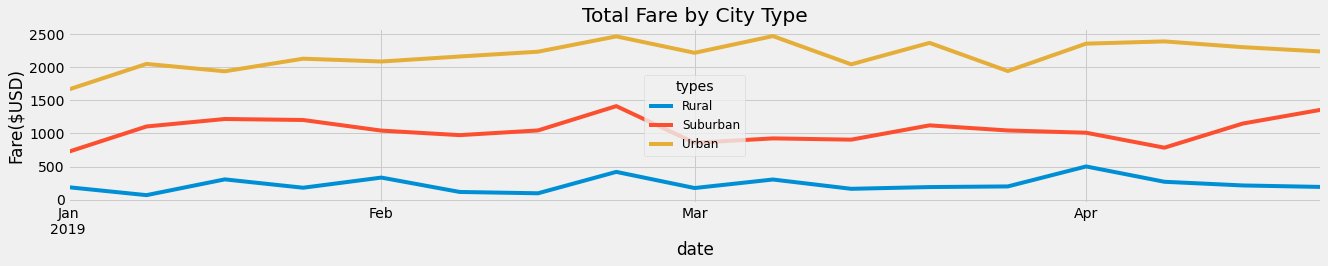

In [58]:
#16 graph the resampled DataFrame from Step 15 using the object-oriented interface method and the df.plot() method, 
#as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. 
#Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png 
#in your "analysis" folder.

#Import stlye from Matplotlib
from matplotlib import style
# Use graph stlye fivethirtyeight
style.use("fivethirtyeight")
#graph the resampled DataFrame from Step 15 using the object-oriented interface method and the df.plot() method

# Set the x-axis to a list of strings for each month.
x_axis = ["Jan 2019", "Feb", "Mar", "April", "May", "June"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [0, 500, 1000, 1500, 2000, 2500]



#Plot the graph
# Create the plot
pyber_data_df_4.plot(figsize=(20,3))

#Annotate the y-axis label and the title, 
#then use the appropriate code to save the figure as PyBer_fare_summary.png in your "analysis" folder.

plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
plt.legend("type")
plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="center", title="types")

plt.show()

In [ ]:
#Save Figure
plt.savefig("PyBer_Analysis/analysis/PyBer_fare_summary.png")